In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance

In [5]:
# Load dataset
df = pd.read_csv('predictive_maintenance.csv')
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['Failure Type']
failure_counts = y.value_counts()


In [7]:
# Encode target and scale features
le = LabelEncoder()
y_encoded = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Compute permutation importance by class
importance_data = []
for i, label in enumerate(le.classes_):
    idx = np.where(y_test == i)[0]
    if len(idx) == 0:
        continue
    result = permutation_importance(rf, X_test[idx], y_test[idx], n_repeats=10, random_state=42)
    for j, feature in enumerate(X.columns):
        importance_data.append({'Failure Type': label, 'Feature': feature, 'Importance': result.importances_mean[j]})
importance_df = pd.DataFrame(importance_data)

In [13]:
# CLI logic
def show_feature_importance():
    print("\n📊 Select failure type to view top 2 features:")
    for i, ftype in enumerate(le.classes_, 1):
        print(f"{i}. {ftype}")
    while True:
        try:
            choice = int(input("Enter number: "))
            failure_type = le.classes_[choice - 1]
            break
        except: print("❌ Invalid input. Try again.")

    top_features = importance_df[importance_df['Failure Type'] == failure_type].nlargest(2, 'Importance')
    print(f"\n🔍 Top 2 features for {failure_type}:")
    for _, row in top_features.iterrows():
        print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")

    plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.title(f"Feature Importance for {failure_type}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

def show_failure_count():
    print("\n📉 Select failure type to view count:")
    for i, ftype in enumerate(failure_counts.index, 1):
        print(f"{i}. {ftype}")
    while True:
        try:
            choice = int(input("Enter number: "))
            failure_type = failure_counts.index[choice - 1]
            break
        except: print("❌ Invalid input. Try again.")
    print(f"\n🧮 {failure_counts[failure_type]} failures due to {failure_type}.")

=== Failure Analysis Tool ===
1. Feature importance by failure type
2. Failure count by type


Select an option (1/2):  1



📊 Select failure type to view top 2 features:
1. Heat Dissipation Failure
2. No Failure
3. Overstrain Failure
4. Power Failure
5. Random Failures
6. Tool Wear Failure


Enter number:  4



🔍 Top 2 features for Power Failure:
Feature: Rotational speed [rpm], Importance: 0.1300
Feature: Torque [Nm], Importance: 0.1250


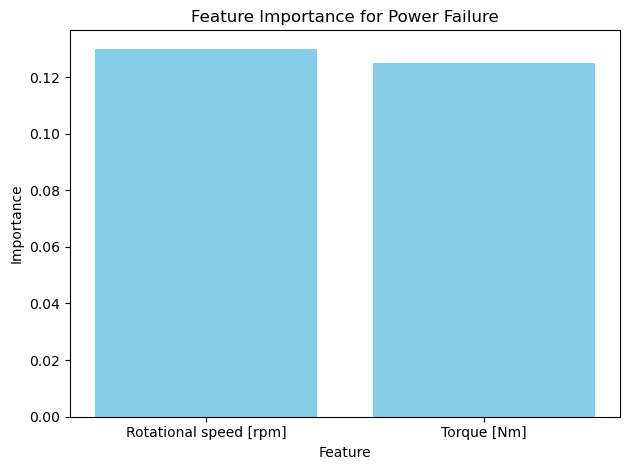

In [15]:
# Main logic
def main():
    print("=== Failure Analysis Tool ===")
    print("1. Feature importance by failure type")
    print("2. Failure count by type")
    option = input("Select an option (1/2): ")

    if option == "1":
        show_feature_importance()
    elif option == "2":
        show_failure_count()
    else:
        print("❌ Invalid option. Exiting.")

if __name__ == "__main__":
    main()